In [21]:
import math

In [22]:
import numpy as np
import pandas as pd

In [23]:
import matplotlib
import matplotlib.pyplot as pp

In [24]:
%matplotlib inline

In [25]:
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

# fix error in some versions of statsmodels
import scipy
if not hasattr(scipy.stats,'chisqprob'):
    scipy.stats.chisqprob = lambda chisq, df: scipy.stats.chi2.sf(chisq, df)

In [26]:
smoking = pd.read_csv("whickham.csv")

In [27]:
smoking = smoking[smoking.age < 65]

In [28]:
smoking

,outcome,smoker,age
0,Alive,Yes,23
1,Alive,Yes,18
4,Alive,No,64
5,Alive,Yes,38
6,Alive,Yes,45
...,...,...,...
1309,Alive,Yes,35
1310,Alive,No,33
1311,Alive,Yes,21
1312,Alive,No,46


In [29]:
color = np.where(smoking.smoker == 'No','skyblue','coral')
jitter = 0.05*(np.random.rand(len(smoking)) - 0.5)
def plotfit(fit):
    pp.scatter(smoking.age,smoking.outcome + jitter,c=color,linewidth=0.2,edgecolor='k',alpha=0.5)
    pp.scatter(smoking.age,fit.predict(smoking),c=color,linewidth=0.2,edgecolor='gray',marker='d')

In [30]:
smoking['outcome'] = 1*(smoking['outcome'] =='Alive')

In [31]:
smoking

,outcome,smoker,age
0,1,Yes,23
1,1,Yes,18
4,1,No,64
5,1,Yes,38
6,1,Yes,45
...,...,...,...
1309,1,Yes,35
1310,1,No,33
1311,1,Yes,21
1312,1,No,46


In [32]:
olsGroupAge = smf.ols('outcome ~ smoker + age', data = smoking).fit()

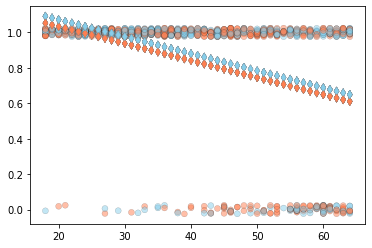

In [33]:
plotfit(olsGroupAge)

In [34]:
olsGroupAge.params

Intercept        1.264665
smoker[T.Yes]   -0.038738
age             -0.009615
dtype: float64

In [35]:
sm.stats.anova_lm(olsGroupAge)

,df,sum_sq,mean_sq,F,PR(>F)
smoker,1.0,0.899981,0.899981,8.181417,4.314608e-03
age,1.0,17.713821,17.713821,161.030213,1.806638e-34
Residual,1068.0,117.483303,0.110003,NaN,NaN


In [39]:
logitGroupAge = smf.logit('outcome ~ smoker + age', data = smoking).fit()

Optimization terminated successfully.
         Current function value: 0.346766
         Iterations 7


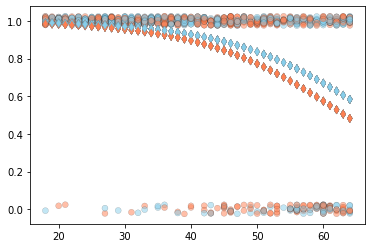

In [40]:
plotfit(logitGroupAge)

In [41]:
logitGroupAge.params

Intercept        6.250847
smoker[T.Yes]   -0.408103
age             -0.092403
dtype: float64

In [43]:
logitGroupAge.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                outcome   No. Observations:                 1071
Model:                          Logit   Df Residuals:                     1068
Method:                           MLE   Df Model:                            2
Date:                Thu, 07 Jan 2021   Pseudo R-squ.:                  0.1776
Time:                        15:32:43   Log-Likelihood:                -371.39
converged:                       True   LL-Null:                       -451.59
Covariance Type:            nonrobust   LLR p-value:                 1.469e-35
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         6.2508      0.469     13.321      0.000       5.331       7.171
smoker[T.Yes]    -0.4081      0.189     -2.164      0.030      -0.778      -0.038
age              -0.0924      0.009    -10.606      0.000      -0.109      -0.075
=================================================================================
"""